In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()
import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv('disease_prediction\Training.csv')

In [3]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
columns=list(data.columns.values)

In [5]:

diseases=list(data['prognosis'].unique())


In [6]:
mapping={}
for i,dis in enumerate(diseases):
    mapping[dis]=i
    

In [85]:
invmapping={v:k for k,v in mapping.items()}

In [7]:
data['prognosis']=data['prognosis'].map(mapping)

In [8]:
itch=data['itching'].value_counts().reset_index()

In [9]:
#data.set_index('prognosis').T.plot(kind='bar', stacked=True)

In [10]:
itch.iplot(kind='bar',x='index')

In [11]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X=np.array(data.iloc[:,:-1])

In [13]:
y=np.array(data.iloc[:,-1])[:,np.newaxis]

In [14]:
print(X.shape,y.shape)

(4920, 132) (4920, 1)


In [15]:
m=len(y)
k=41
ones=np.ones([m,1])
X=np.hstack([ones,X])

In [16]:
m,n=X.shape
print(X.shape,y.shape)

(4920, 133) (4920, 1)


In [17]:
theta=np.zeros([k,n])

In [18]:
print(theta.shape,X.shape,y.shape)

(41, 133) (4920, 133) (4920, 1)


In [19]:
def sigmoid(X):
    return 1/1+np.exp(-X)

In [20]:
def costfunction(theta,X,y,lmbda):
    temp=np.dot(y.T,np.log(sigmoid(np.dot(X,theta))))+np.dot((1-y).T,np.log(1-sigmoid(np.dot(X,theta))))
    return (temp/(-m))+np.sum(theta[1:]**2)*((lmbda)/(2*m))

In [21]:
def gradient(theta,X,y,lmbda):
    temp=sigmoid(np.dot(X,theta))-y
    temp=(np.dot(X.T,temp)/m)+theta * lmbda / m
    temp[0]=temp[0]-theta[0] * lmbda / m
    return temp

In [22]:
import scipy.optimize as opt
lmbda =1001
k=41
theta=np.zeros((k,n))

for i in range(k):
    digit_class=i 
    theta[i]=opt.fmin_cg(f=costfunction,x0=theta[i],fprime=gradient,args=(X,(y==digit_class).flatten(),lmbda),maxiter=50)

Optimization terminated successfully.
         Current function value: nan
         Iterations: 1
         Function evaluations: 112
         Gradient evaluations: 112
Optimization terminated successfully.
         Current function value: nan
         Iterations: 1
         Function evaluations: 112
         Gradient evaluations: 112
Optimization terminated successfully.
         Current function value: nan
         Iterations: 1
         Function evaluations: 112
         Gradient evaluations: 112
Optimization terminated successfully.
         Current function value: nan
         Iterations: 1
         Function evaluations: 112
         Gradient evaluations: 112
Optimization terminated successfully.
         Current function value: nan
         Iterations: 1
         Function evaluations: 112
         Gradient evaluations: 112
Optimization terminated successfully.
         Current function value: nan
         Iterations: 1
         Function evaluations: 112
         Gradient evaluatio

In [23]:
theta=np.zeros((k,n))
costfunction(theta[0],X,y==0,100000000000000000)

array([nan])

In [24]:
X=(X-np.mean(X))/(np.std(X))

In [25]:
y.T@np.log(sigmoid(np.dot(X,theta[0])))

array([68205.6825671])

In [26]:
sigmoid(np.dot(X,theta[0]))

array([2., 2., 2., ..., 2., 2., 2.])

In [27]:
# data exploration section
data['Noofdiseases']=data.iloc[:,:-1].sum(axis=1)
output=data['prognosis'].value_counts().sort_values().reset_index()

In [28]:
output.iplot(kind='pie',labels='index',values='prognosis',pull=0.05)

In [29]:
data['itching'].value_counts().reset_index().iplot(kind='pie',labels='index',values='itching',pull=0.05,hole=0.1)

In [30]:
data['itching'].value_counts().reset_index().iplot(kind='pie',labels='index',values='itching',pull=0.05,hole=0.1)

In [50]:
lis=[]
for i,each in enumerate(data.columns.values):
    df=data[each].value_counts().reset_index()
    lis.append(df)

In [51]:
df_final=pd.concat(lis,axis=1)[:2]
df_final.drop(['index'],axis=1,inplace=True)
df_final['index']=0
df_final['index'].loc[0]=0
df_final['index'].loc[1]=1
    
df_final.drop(['prognosis'],axis=1,inplace=True)
df_final['index'][1]=1

In [52]:
df_final


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Noofdiseases,index
0,4242.0,4134.0,4812.0,4698.0,4812.0,4122.0,4236.0,4698.0,4698.0,4812.0,...,4812.0,4806.0,4806.0,4806.0,4806.0,4806.0,4806.0,4806.0,858.0,0
1,678.0,786.0,108.0,222.0,108.0,798.0,684.0,222.0,222.0,108.0,...,108.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,780.0,1


In [33]:
disyes=df_final.loc[1].reset_index().sort_values([1],ascending=False)

In [34]:
#sorted based on most common symptomps
disyes.iplot(kind='bar',x='index',y=1)

In [35]:
#top 20 most common diseases
disyes[:20].iplot(kind='bar',x='index')

In [36]:
#top 20 most common diseases share percentage
disyes[:20].iplot(kind='pie',labels='index',values=1)

In [58]:
#10 lowest common symtomps
disyes[::-10].iplot(kind='bar',x='index')

In [59]:
#top 10 lowect common symptomps share percentage
disyes[::-10].iplot(kind='pie',labels='index',values=1,hole=0.1,pull=0.1)

Text(0, 0.5, 'Wine Alcohol %')

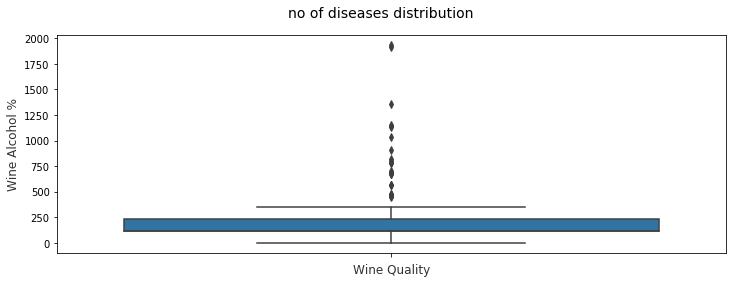

In [64]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('no of diseases distribution', fontsize=14)

sns.boxplot(data=disyes,  
            y=1, 
            ax=ax)

ax.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size=12,alpha=0.8)

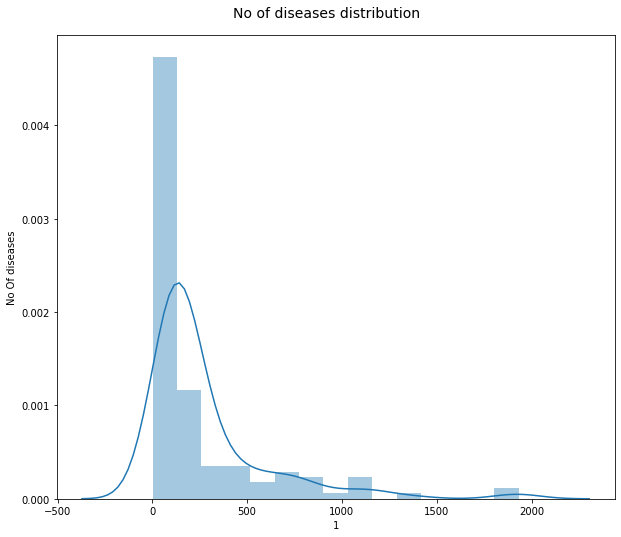

In [66]:
#the distribution is right skewed
fig = plt.figure(figsize=(10,8))
title = fig.suptitle("No of diseases distribution", fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("")
ax.set_ylabel("No Of diseases") 

g = sns.FacetGrid(data=disyes,  
                  palette={"red": "r", "white": "y"})

g.map(sns.distplot, 1, 
      kde=True, bins=15, ax=ax)

plt.close(2)

Text(0, 0.5, '1')

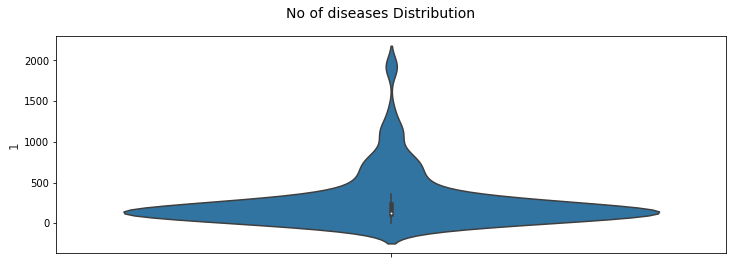

In [74]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('No of diseases distribution', fontsize=14)

sns.violinplot(data=disyes,
               y=1,   
               ax=ax)

ax.set_ylabel(1,size=12,alpha=0.8)

In [75]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Noofdiseases
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [110]:
# above was based on symtomps 

#now based on diseases

progno=data.groupby(['prognosis']).agg({'Noofdiseases':sum}).sort_values(by='Noofdiseases',ascending=False).reset_index()

In [111]:
progno['prognosis']=progno['prognosis'].apply(lambda x:invmapping[x])

In [116]:
#sorted based on most common diseases
progno.iplot(kind='bar',x='prognosis',y='Noofdiseases')

In [128]:
#top 20 most common diseases share percentage
progno[:20].iplot(kind='pie',labels='prognosis',values='Noofdiseases',hole=0.2,pull=0.2)

In [125]:
# top 10 lowet no of diseases
progno[::-3].iplot(kind='bar',x=['prognosis'])

In [130]:
#top 10 lowect common diseases share percentage
progno[::-3].iplot(kind='pie',labels='prognosis',values='Noofdiseases',hole=0.1,pull=0.1)

Text(0, 0.5, 'No of diseases')

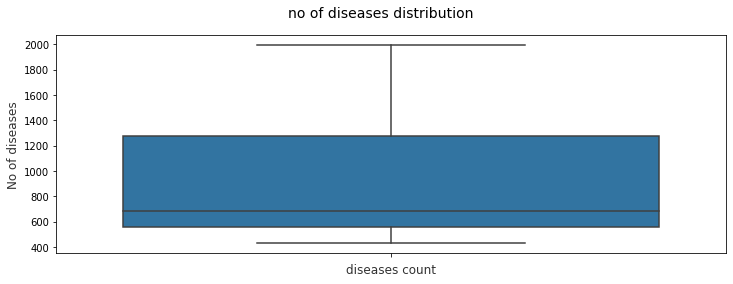

In [133]:
#distribution

f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('no of diseases distribution', fontsize=14)

sns.boxplot(data=progno,  
            y='Noofdiseases', 
            ax=ax)

ax.set_xlabel("diseases count",size=12,alpha=0.8)
ax.set_ylabel("No of diseases",size=12,alpha=0.8)

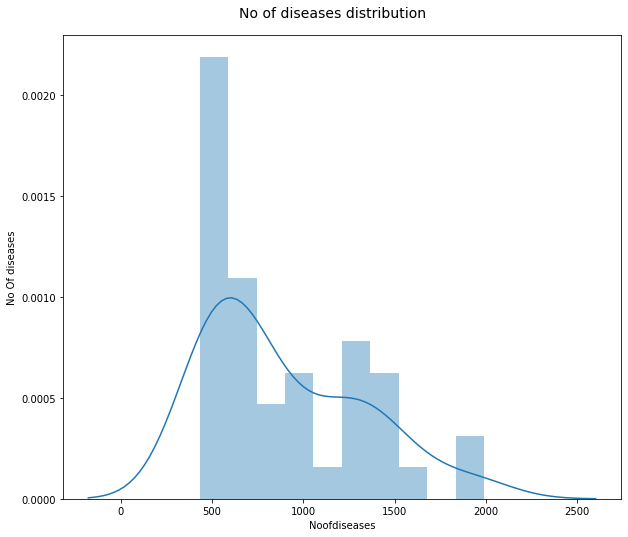

In [136]:
#the distribution is right skewed
fig = plt.figure(figsize=(10,8))
title = fig.suptitle("No of diseases distribution", fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("")
ax.set_ylabel("No Of diseases") 

g = sns.FacetGrid(data=progno,  
                  palette={"red": "r", "white": "y"})

g.map(sns.distplot, 'Noofdiseases', 
      kde=True, bins=10, ax=ax)

plt.close(2)

Text(0, 0.5, '1')

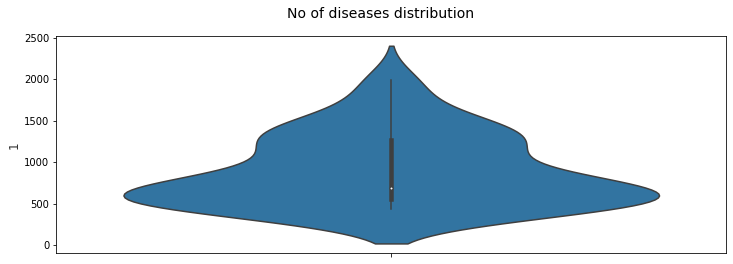

In [137]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('No of diseases distribution', fontsize=14)

sns.violinplot(data=progno,
               y='Noofdiseases',   
               ax=ax)

ax.set_ylabel(1,size=12,alpha=0.8)

In [39]:
data['Noofdiseases'].reset_index().sort_values(['Noofdiseases'],ascending=False).drop_duplicates('Noofdiseases').\
iplot(kind='pie',labels='index',values='Noofdiseases')


In [40]:
data['Noofdiseases'].reset_index().sort_values(['Noofdiseases'],ascending=False).drop_duplicates('Noofdiseases')\
.sort_values(['Noofdiseases'],ascending=False).iplot(kind='bar',x='index',y='Noofdiseases')

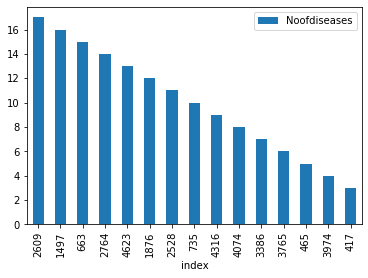

In [41]:
data['Noofdiseases'].reset_index().sort_values(['Noofdiseases'],ascending=False).drop_duplicates('Noofdiseases').plot(kind='bar',x='index')

In [159]:
dis_sympt=data[['Noofdiseases','prognosis']].reset_index().sort_values(['Noofdiseases'],ascending=False)

In [163]:
dis_sympt['prognosis']=dis_sympt['prognosis'].apply(lambda x:invmapping[x])

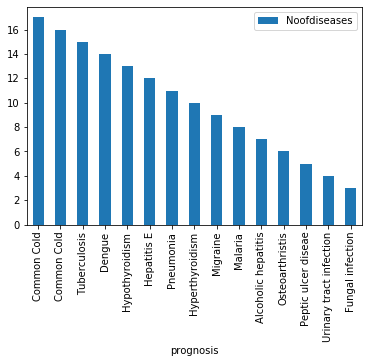

In [170]:
dis_sympt.drop_duplicates(['Noofdiseases']).plot(kind='bar',x='prognosis',y='Noofdiseases')

In [197]:
totsym_totpat=dis_sympt['Noofdiseases'].value_counts().rename_axis(['totalsymtomps']).rename('totalpatients').reset_index()

In [198]:
totsym_totpat=(totsym_totpat-np.mean(totsym_totpat,axis=0))/(np.std(totsym_totpat,axis=0))

Text(0, 0.5, 'totalpatients')

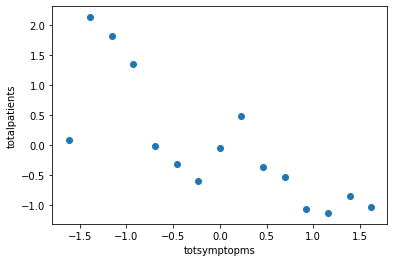

In [211]:
plt.scatter(totsym_totpat.iloc[:,0],totsym_totpat.iloc[:,1])
plt.xlabel('totsymptopms')
plt.ylabel('totalpatients')

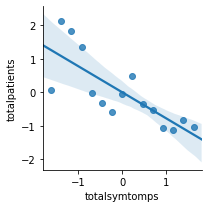

In [214]:
g = sns.FacetGrid(totsym_totpat)
g.map(sns.regplot, 'totalsymtomps', 'totalpatients')


